In [2]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import multiprocess

In [3]:
df_M20 = pd.read_csv('combined_M20.csv')

In [10]:
# Get counts for each site
df_siteID = df_M20.groupby(['site_ID']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
weekday = np.sort(df_M20['DayOfWeek'].unique())

In [11]:
df_siteID.head()

,site_ID,count
32,M20/6572A,493022
33,M20/6576A,492599
8,M20/6481A,448988
17,M20/6514A,448968
5,M20/6472A,448966


### Get long traffic counts for a site on a specific weekday.

In [137]:
def get_longveh_site_weekday(site, day):

    site_ID = df_siteID['site_ID'].iloc[site] #get the site vased on the counts
    df_M20_ID = df_M20.loc[df_M20['site_ID'] == site_ID]   
    
    df_site_day = df_M20_ID.loc[df_M20_ID['DayOfWeek'] == weekday[day]].sort_values(by=['data_hour', 'data_date'])

    #Analyze traffic after covid pandemic
    df_site_day['data_date'] = pd.to_datetime(df_site_day['data_date'])
    df_site_day_sub = df_site_day[df_site_day['data_date'] > '2022-04-01'] 
    
    #get long traffic and 
    df_long = pd.DataFrame(df_site_day_sub.groupby(['data_date','data_hour'])['Long'].sum()).reset_index()

    pivot_df_long = df_long.pivot(index='data_date', columns='data_hour', values='Long')
    
    #remove days with missing values
    pivot_df_long_nomissing = pivot_df_long[(pivot_df_long != 0).all(axis=1)]
    pivot_df_long_nomissing_trans = pivot_df_long_nomissing.T
       
    pivot_df_long_nomissing_trans.to_csv(f"site{site}_day{day}_long_traffic.csv")
   
    return pivot_df_long_nomissing_trans

In [138]:
def plot_eachday_avg(data, site, day, title="Traffic Trends by Hour", include_average=True):
    # Calculate the average 
    hourly_average = data.mean(axis=1) if include_average else None

    # Reshape the data to a long-form format suitable for plotting
    data_long = data.reset_index().melt(id_vars='data_hour', var_name='Date', value_name='Long_Traffic')

    # Create the plot using Seaborn
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Set the background color of the entire plot
    fig.patch.set_facecolor('lightgray')  # Fill the whole figure's background with light gray

    # Set the background color of the axes (the area where the plot is drawn)
    ax.set_facecolor('whitesmoke')  # Change the axes background to a lighter shade (can be adjusted)


    # Plot individual dates, using royalblue color, without legend, markers, and with reduced line width
    sns.lineplot(data=data_long, x='data_hour', y='Long_Traffic', hue='Date', alpha=0.7, linewidth=1, 
                 legend=False, palette=["royalblue"])    

    # Plot the average if requested
    if include_average:
        # Create a DataFrame for the average line
        average_df = pd.DataFrame({
            'data_hour': data.index,
            'Long_Traffic': hourly_average
        })
        sns.lineplot(data=average_df, x='data_hour', y='Long_Traffic', label="Average", color="red", linewidth=2)

    # Customize the plot
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Hour of Day", fontsize=12)
    ax.set_ylabel("Long Traffic", fontsize=12)
    ax.set_xticks(range(0, 24, 2))

    # Add a gray grid with specified properties
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

    # Remove borders by making spines invisible
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust the layout for better spacing
    fig.tight_layout()

    # Generate the output directory and filename
    output_dir = 'plots'
    os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists
    
    # Save the plot with site and day in the filename
    filename = f'{output_dir}/site{site}_day{day}_long_traffic.png'  # Save as PNG (can also use .jpg, .pdf, etc.)
    fig.savefig(filename)

    # Show the plot
    plt.show()

### Plot traffic on Wednesday

In [139]:
df_site0_day3 = get_longveh_site_weekday(site=0,day=3)

/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/var/folders/f2/9jw4nsyx5ws5bt47f71z_4jc0000gr/T/ipykernel_11307/454106979.py:23: UserWarning: 
The palette list has fewer values (1) than needed (63) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data_long, x='data_hour', y='Long_Traffic', hue='Date', alpha=0.7, linewidth=1,
/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

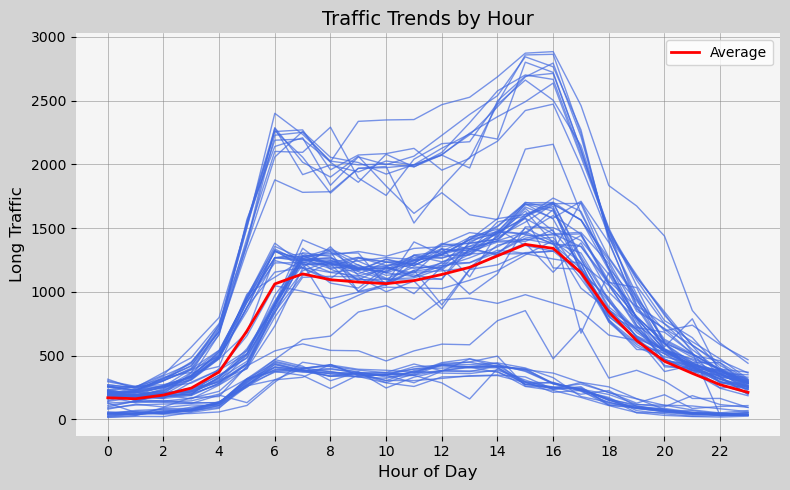

In [140]:
plot_eachday_avg(df_site0_day3, site=0, day=3)

### Plot traffic on Sunday

In [141]:
df_site0_day3 = get_longveh_site_weekday(site=0,day=0)

/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/var/folders/f2/9jw4nsyx5ws5bt47f71z_4jc0000gr/T/ipykernel_11307/454106979.py:23: UserWarning: 
The palette list has fewer values (1) than needed (68) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data_long, x='data_hour', y='Long_Traffic', hue='Date', alpha=0.7, linewidth=1,
/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wjiang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

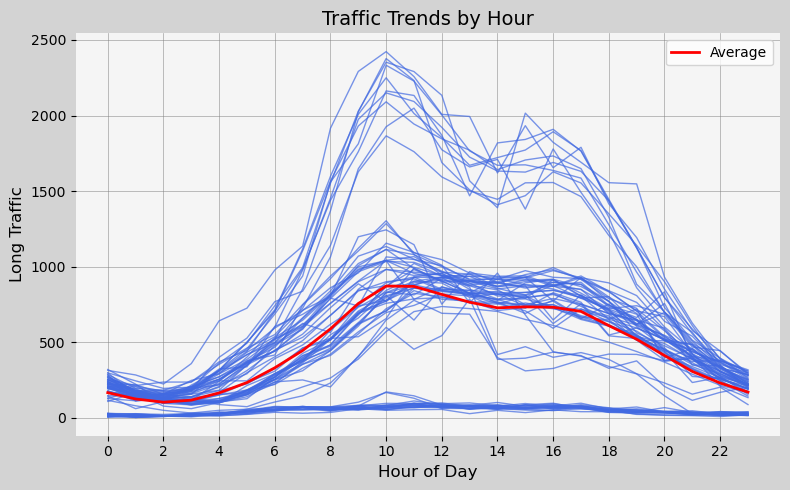

In [142]:
plot_eachday_avg(df_site0_day3, site=0, day=0)